# Peluang Usaha Terbaik Untuk Tempat Makan di LA


Daftar Isi :
- Pendahuluan
- Pra-pemrosesan Data
    - Memuat Library
    - Memuat Data
    - Memisahkan Nama Jalan dari Alamat
- Analisis Data
     - Proporsi Berbagai Jenis Usaha
     - Proporsi Usaha Waralaba dan Non-Waralaba
     - Jenis Usaha Waralaba
     - Jumlah Rata-rata Kursi
     - 10 Nama Jalan Teratas Berdasarkan Jumlah Restoran
     - Jalan Dengan 1 Jenis Usaha Saja
- Kesimpulan
- Presentasi


# Pendahuluan
Saya telah memutuskan untuk membuka sebuah kafe kecil di Los Angeles. Kafe ini bisa dibilang cukup unik, karena saya "memperkerjakan" robot sebagai pelayan atau pramusaji. Proyek ini memang menjanjikan, namun membutuhkan modal yang besar. Oleh karena itu, saya dan para mitra memutuskan untuk menarik minat investor. Mereka tertarik dengan kondisi pasar saat ini—namun, kita perlu mempertahankan kesuksesan saat daya tarik sang robot mulai pudar.

Para mitra pun meminta saya untuk mempersiapkan sejumlah riset pasar. Berikut data yang saya miliki data dari sumber terbuka (open source) terkait jenis-jenis usaha tempat makan di LA.

## Pra-pemrosesan Data
### Memuat Library

In [1]:
# memuat library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import warnings
warnings.filterwarnings('ignore')

### Memuat Data

In [2]:
# memuat data
rest = pd.read_csv('/datasets/rest_data_us.csv')

In [3]:
# menampilkan data
rest.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [4]:
# menampilkan informasi umum
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [5]:
# mengecek missing value
rest.isnull().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [6]:
# menampilkan data yang memiliki missing value
rest[rest['chain'].isnull()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [7]:
rest = rest.dropna()

In [8]:
# mengecek missing value
rest.isnull().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

In [9]:
# mengecek duplicate value
rest.duplicated().sum()

0

### Memisahkan Nama Jalan dari Alamat
Kita perlu memisahkan nama jalan dari kolom alamat untuk menganalisis jumlah restoran yang ada pada setiap jalan. Untuk itu kita membuat fungsi dibawah ini.

In [10]:
# Membuat fungsi untuk mengambil nama jalan dari kolom address
def get_street_name(txt):
  txt = pd.Series(txt.split(' '), name='text')

  start=0
  end=len(txt)-1

  for i in range(len(txt)):
    if i == 0:
      if txt[i].isnumeric():
        start = 1
    if i == 1:
      if txt[i] == '1/2':
        start = 2
      elif txt[i] == '1/4':
        start = 2
      elif txt[i] == '3/4':
        start = 2
      elif txt.isin(['ST', 'AVE', 'WAY', 'BLVD', 'AVENUE'])[i]:
        end=i
        return ' '.join(txt.loc[start:end])  
      elif i == end:
          return ' '.join(txt.loc[start:end])
    elif i > 1:
      if txt.isin(['ST', 'AVE', 'WAY', 'BLVD', 'AVENUE'])[i]:
        end=i
        return ' '.join(txt.loc[start:end])
      elif txt.isin(['STE', 'UNIT', 'unit', 'FL', 'A260', 'E13'])[i]:
        end=i-1
        return ' '.join(txt.loc[start:end])
      elif txt.str.contains('#')[i]:
        end=i-1
        return ' '.join(txt.loc[start:end])
      elif txt[i].isnumeric():
        end=i-1
        return ' '.join(txt.loc[start:end])
      elif txt.str.contains('-')[i]:
        end=i-1
        return ' '.join(txt.loc[start:end])
      elif i == end:
          return ' '.join(txt.loc[start:end])

Fungsi ini akan mengabaikan angka pada bagian depan jalan dan nomor unit yang dimulai dengan tanda '#'. Jadi kita hanya akan mengambil nama jalannya saja.

In [11]:
# mengaplikasikan fungsi pada kolom
rest['street_name'] = rest['address'].apply(get_street_name)

In [12]:
# menampilkan data terbaru
rest

,id,object_name,address,chain,object_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,S SPRING ST


Sekarang kita telah memiliki kolom street_name. Kita bisa melanjutkan ke tahap analisis data.

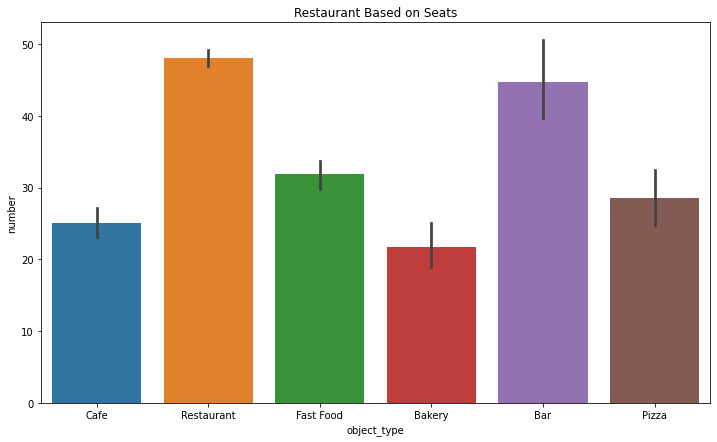

In [13]:
# membuat grafik berdasarkan jenis usaha
plt.figure(figsize=(12, 7))
plt.title('Restaurant Based on Seats')
ax = sns.barplot(x='object_type', y='number', data=rest)

Berdasarkan jumlah kursi, tipe restaurant dan bar memiliki jumlah kursi terbanyak. Hal ini tentunya lumrah karena banyak orang yang datang untuk makan siang dan makan malam di restoran, dan biasanya ada juga pengunjung yang datang diluar jam makan. Hal demikian juga serupa pada bar, biasanya bar ramai pada saat menjelang malam. Biasanya pengunjung yang datang mampir seusai jam kerja.

### Proporsi Usaha Waralaba dan Non-waralaba
Investigate the proportions of chain and nonchain establishments. Plot a graph. 

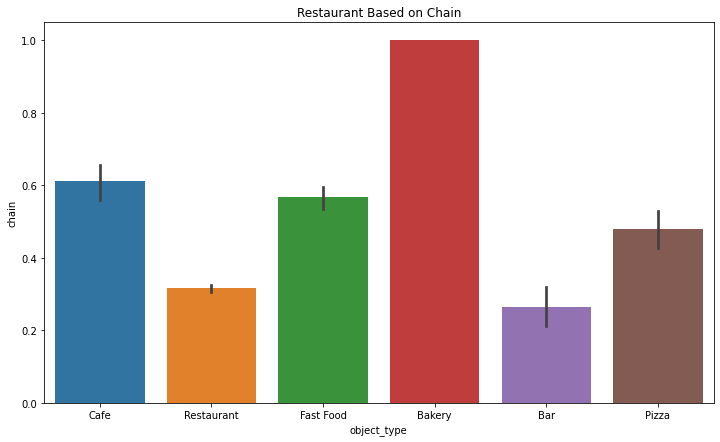

In [14]:
# membuat grafik jenis usaha waralaba dan non-waralaba
plt.figure(figsize=(12, 7))
plt.title('Restaurant Based on Chain')
ax = sns.barplot(x='object_type',y='chain', data=rest)

Dari grafik diatas, type usaha berbasis waralaba bakery menempati urutan pertama. Menilik dari halaman situs https://pos.toasttab.com/blog/on-the-line/how-much-do-bakeries-make#:~:text=However%2C%20bakeries%20have%20great%20profit,picture%20of%20your%20sales%20potential :
- Tipe usaha bakery memiliki peluang keuntungan yang bagus karena modal yang dikeluarkan lebih sedikit dibandingkan usaha waralaba restoran dan dengan jumlah pekerjaan/pegawai yang lebih sedikit juga.
- Rata-rata bakery shop di US menghasilkan profit sebesar 3 miliar dolar jika digabungkan, dan untuk bakery shop kecil dan menengah menghasilkan antara 325.000 hingga 450.000 dolar.

Di urutan kedua, ada jenis usaha cafe dan menyusul dibawahnya dengan selisih yang tidak jauh ada jenis usaha fast food. Restoran dan bar berada di peringkat 2 terbawah.
Menilik dari halaman situs berikut https://home.binwise.com/blog/restaurant-profit-margin#:~:text=Are%20Restaurants%20Profitable%3F,restaurant%20to%20turn%20a%20profit :
- Restoran memang menguntungkan namun memiliki low profit margins, butuh setidaknya sekitar 2 tahun untuk sebuah restoran baru dapat menghasilkan profit.
- Profit restoran tidak luput dipengaruhi oleh lokasi, harga yang bersaing, dan biaya hidup yang dimiliki oleh para pengunjung.

Hal demikian juga diterapkan pada jenis usaha bar.

### Jenis Usaha Waralaba
Bisa dikatakan kelima jenis usaha yang sedang kita analisis umumnya adalah waralaba. Namun tidak menutup kemungkinan ada sebagian dari tiap jenis usaha tersebut yang bukan merupakan waralaba. Tipe restoran, fast food dan pizza sering memiliki lebih dari 1 outlet dan dapat ditemukan di berbagai tempat.

### Jumlah Rata-rata Kursi Untuk Setiap Jenis Usaha

In [15]:
seat_total = rest.pivot_table(index=['object_type','chain'], values='number', aggfunc=['sum','mean'])
seat_total.columns = ['seat_total','seat_total_mean']
seat_total.reset_index()

,object_type,chain,seat_total,seat_total_mean
0,Bakery,True,6162,21.773852
1,Bar,False,9972,46.381395
2,Bar,True,3100,40.259740
3,Cafe,False,3981,23.556213
4,Cafe,True,6894,25.917293
5,Fast Food,False,10895,23.633406
6,Fast Food,True,23044,38.089256
7,Pizza,False,5200,31.325301
8,Pizza,True,3906,25.529412
9,Restaurant,False,245688,49.523886


<AxesSubplot:ylabel='object_type,chain'>

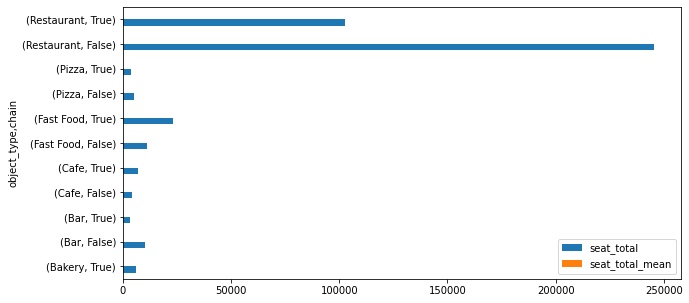

In [16]:
seat_total.plot(kind='barh', figsize=(10,5))

Usaha bakery dipastikan adalah jenis waralaba. Dan kelima jenis usaha lainnya masing-masing terbagi menjadi usaha waralaba dan non-waralaba. Tipe usaha waralaba memiliki jumlah kursi yang lebih sedikit dibanding non-waralaba.

<AxesSubplot:ylabel='object_type,chain'>

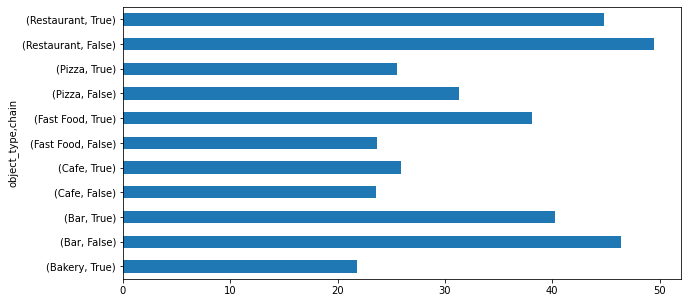

In [17]:
seat_total['seat_total_mean'].plot(kind='barh',figsize=(10,5))

Secara rata-rata, jenis usaha yang memiliki kursi terbanyak adalah restoran, hal ini tentunya wajar karena umumnya banyak pengunjung yang memilih makan langsung di tempat. Selanjutnya ada jenis usaha bar, ini karena pengunjung banyak menghabiskan waktu di bar menikmati minuman langsung disana, jarang terdengar ada yang take away minuman di bar bukan?

### 10 Nama Jalan Teratas Berdasarkan Jumlah Usaha

In [18]:
# menghitung 10 nama jalan teratas dengan jumlah usaha terbanyak dan distribusi kursi
type_count = rest.groupby('street_name').agg({'object_type' : ['max','count'], 'number':'sum'})
type_count.columns = ['object_type','object_count','seats_total']
top_street = type_count.sort_values(by='object_count',ascending=False).reset_index().head(10)
top_street

,street_name,object_type,object_count,seats_total
0,WILSHIRE BLVD,Restaurant,384,20087
1,W SUNSET BLVD,Restaurant,368,17945
2,W PICO BLVD,Restaurant,342,13535
3,S WESTERN AVE,Restaurant,277,11351
4,SANTA MONICA BLVD,Restaurant,262,9164
5,HOLLYWOOD BLVD,Restaurant,241,13703
6,W OLYMPIC BLVD,Restaurant,234,12079
7,W 3RD ST,Restaurant,231,9050
8,S FIGUEROA ST,Restaurant,228,11181
9,W 6TH ST,Restaurant,213,8543


- 10 jalan teratas memiliki satu kesamaan yaitu tipe usahanya adalah restoran. Tampaknya peluang restoran di daerah diatas menjanjikan sehingga jumlahnya bisa mencapai hingga ratusan gerai di setiap tempatnya. 3 urutan teratas memiliki jumlah restoran diatas 300 gerai bahkan hanpir 400 gerai.

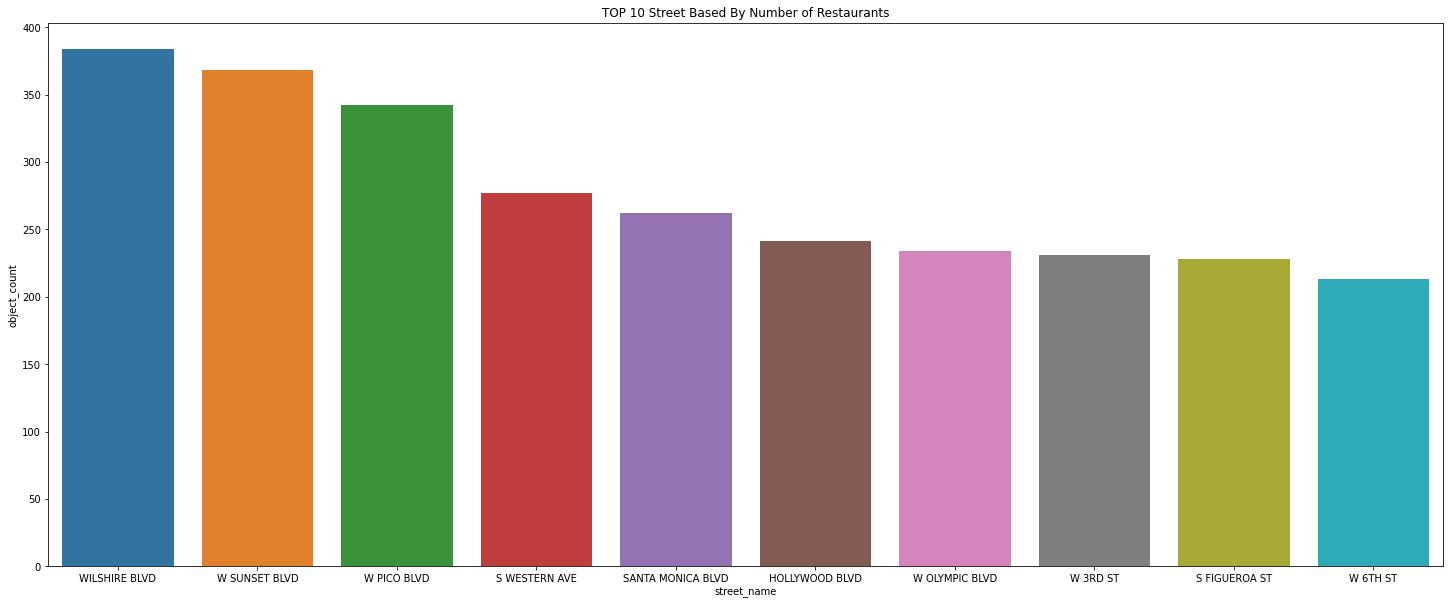

In [19]:
# menampilkan grafik top 10 jalan dengan usaha terbanyak
plt.figure(figsize=(25, 10))
plt.title('TOP 10 Street Based By Number of Restaurants')
tx = sns.barplot(x='street_name',y='object_count', data=top_street)

- Jalan yang memiliki jumlah restoran paling banyak adalah "WILLSHIRE BLVD" yang mencapai 384 gerai restoran. Menyusul di urutan kedua dengan selisih tidak jauh, ada jalan "W SUNSET BLVD" dengan jumlah restoran sebanyak 368. Selanjutnya ada "W PICO BLVD" yang ditempati 342 unit restoran.
- Dari urutan ke-6 hingga ke-10 jumlahnya menurun dan memiliki selisih tipis satu sama lain. Mungkin lokasi jalan-jalan tersebut agak jauh dari pusat kota maupun perkantoran dan perumahan. 

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

In [20]:
# memfilter data untuk melihat distribusi kursi
wilshire = rest[(rest['street_name']=='WILSHIRE BLVD')]

In [21]:
# menampilkan data yang sudah difilter
wilshire

,id,object_name,address,chain,object_type,number,street_name
16,11802,HMS BOUNTY,3357 WILSHIRE BLVD,False,Restaurant,147,WILSHIRE BLVD
22,11808,CAMY'S GRILL,3339 WILSHIRE BLVD,False,Restaurant,39,WILSHIRE BLVD
132,11918,CORAL FISH,6357 WILSHIRE BLVD,False,Restaurant,7,WILSHIRE BLVD
172,11958,YOSHINOYA #1147,3959 WILSHIRE BLVD STE A3-A5,True,Restaurant,35,WILSHIRE BLVD
182,11968,SUBWAY #1763,3959 WILSHIRE BLVD STE B-7,True,Fast Food,17,WILSHIRE BLVD
...,...,...,...,...,...,...,...
9463,21249,TWIST BAKE SHOP,4357 WILSHIRE BLVD,False,Restaurant,44,WILSHIRE BLVD
9500,21286,ONE CAFE,3250 WILSHIRE BLVD # 101A,True,Restaurant,8,WILSHIRE BLVD
9532,21318,ENERGY LIFE CAFE,5670 WILSHIRE BLVD # 160,False,Restaurant,44,WILSHIRE BLVD
9579,21365,THE FAMILY CAFE,12121 WILSHIRE BLVD # 110,False,Restaurant,11,WILSHIRE BLVD


Text(0.5, 1.0, 'Seats Distribution Per Restaurant')

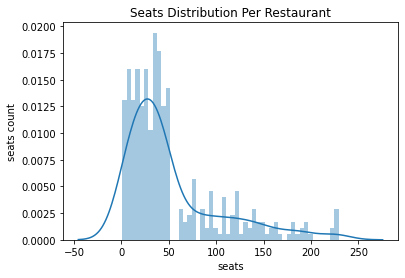

In [22]:
# membuat grafik distribusi
sns.distplot(wilshire['number'],bins=50)
plt.xlabel("seats")
plt.ylabel("seats count")
plt.title("Seats Distribution Per Restaurant")

Dari grafik diatas, kita bisa melihat jika distribusi kursi pada jalan "WILSHIRE BLVD" lebih banyak berjumlah di angka 1 hingga 50 kursi per toko. Jumlah kursi ini sepertinya dimiliki oleh restoran kecil hingga menengah. Sedangkan jumlah kursi sisanya dengan angka diatas 50, dimiliki restoran dengan ruangan yang lebih luas atau lebih dari 1 lantai.

### Jalan Yang Hanya Memiliki 1 Usaha

In [23]:
# memfilter jalan yang hanya memiliki 1 jenis usaha 
one_object_street = rest.groupby('street_name').agg({'object_type' : ['min','count']})
one_object_street.columns = ['object_type','object_count']
one_object_street[one_object_street['object_count'] == 1]

,object_type,object_count
street_name,,
2ND ST,Cafe,1
4TH ST,Fast Food,1
5TH ST,Restaurant,1
ABBOT KINNEY,Restaurant,1
ACADEMY DR,Restaurant,1
...,...,...
WILSHIRE,Restaurant,1
YALE ST,Restaurant,1
Z00 DR,Restaurant,1


Kita juga mendapatkan jalan-jalan mana saja yang hanya memiliki 1 jenis usaha. Ada lebih dari 300 jalan yang memiliki 1 usaha saja. Jumlah ini tentunya sedikit sekali jika dibandingkan dengan jalan lain yang memiliki beberapa jenis usaha.

## Kesimpulan

**Berdasarkan analisis yang telah kita lakukan, berikut beberapa kesimpulan yang didapat:**
- Tipe usaha bakery memiliki peluang keuntungan yang bagus karena modal yang dikeluarkan lebih sedikit dibandingkan usaha waralaba restoran dan dengan jumlah pekerjaan/pegawai yang lebih sedikit juga.
- Rata-rata bakery shop di US menghasilkan profit sebesar 3 miliar dolar jika digabungkan, dan untuk bakery shop kecil dan menengah menghasilkan antara 325.000 hingga 450.000 dolar.
- Walaupun jenis usaha bakery menempati urutan pertama dalam segi waralaba, kenyataannya jenis usaha restoran lebih populer.
- Restoran memang menguntungkan namun memiliki low profit margins, butuh setidaknya sekitar 2 tahun untuk sebuah restoran baru dapat menghasilkan profit.
- Profit restoran tidak luput dipengaruhi oleh lokasi, harga yang bersaing, dan biaya hidup yang dimiliki oleh para pengunjung.

**Berikut rekomendasi jenis usaha berdasarkan kesimpulan:**
- Jenis usaha restoran lebih digemari, untuk restoran yang baru merintis, kursi yang digunakan bisa dimulai dari 10 hingga 20 kursi, yang pembagiannya dapat disesuaikan dengan meja, misal per meja 2 kursi dan ada yang menggunakan 4 kursi.
- Jika ingin mengembangkan usaha berbasis waralaba, jenis usaha bakery merupakan pilihan terbaik. Dengan modal dan cost yang lebih sedikit dari restoran, bakery dapat menghasilkan profit yang cukup besar.

## Presentasi

(link presentasi)  :  <https://1drv.ms/b/s!AgrxGwNB6uxhglyhViq23J-p8ig7?e=tL1K7v>